In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
kc_house = pd.read_csv('data/kc_house_data.csv')
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

### and the metadata:...

###  Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.

### Target
In this project I will be investigating the 'price' variable as the target, or dependent variable.

### Hypothesis
The Null Hypothesis will be that there is no relationship between any of these variables and the price of a house in Kings County.

The Alternative Hypothesis will be that there is some relationship between these variables and the price of a house in Kings County.

### Which other columns to keep?

Are there any variables which will not have an effect on price?

* id
* date
* address

I'll remove these

In [4]:
kc_house = kc_house.drop(columns=['id', 'date', 'address'])
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30155 non-null  float64
 1   bedrooms       30155 non-null  int64  
 2   bathrooms      30155 non-null  float64
 3   sqft_living    30155 non-null  int64  
 4   sqft_lot       30155 non-null  int64  
 5   floors         30155 non-null  float64
 6   waterfront     30155 non-null  object 
 7   greenbelt      30155 non-null  object 
 8   nuisance       30155 non-null  object 
 9   view           30155 non-null  object 
 10  condition      30155 non-null  object 
 11  grade          30155 non-null  object 
 12  heat_source    30123 non-null  object 
 13  sewer_system   30141 non-null  object 
 14  sqft_above     30155 non-null  int64  
 15  sqft_basement  30155 non-null  int64  
 16  sqft_garage    30155 non-null  int64  
 17  sqft_patio     30155 non-null  int64  
 18  yr_bui

I'll also remove some that dont seem to be as crucial at this stage, including;
* view
* sqft_above
* sqft_basement
* yr_renovated
* lat
* long

In [5]:
kc_house = kc_house.drop(columns=['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long'])
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30155 non-null  float64
 1   bedrooms      30155 non-null  int64  
 2   bathrooms     30155 non-null  float64
 3   sqft_living   30155 non-null  int64  
 4   sqft_lot      30155 non-null  int64  
 5   floors        30155 non-null  float64
 6   waterfront    30155 non-null  object 
 7   greenbelt     30155 non-null  object 
 8   nuisance      30155 non-null  object 
 9   condition     30155 non-null  object 
 10  grade         30155 non-null  object 
 11  heat_source   30123 non-null  object 
 12  sewer_system  30141 non-null  object 
 13  sqft_garage   30155 non-null  int64  
 14  sqft_patio    30155 non-null  int64  
 15  yr_built      30155 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 3.7+ MB


In [6]:
kc_house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source     32
sewer_system    14
sqft_garage      0
sqft_patio       0
yr_built         0
dtype: int64

I may as well just get rid of these null values so they dont skew the results.

In [7]:
kc_house = kc_house.dropna()
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30111 non-null  float64
 1   bedrooms      30111 non-null  int64  
 2   bathrooms     30111 non-null  float64
 3   sqft_living   30111 non-null  int64  
 4   sqft_lot      30111 non-null  int64  
 5   floors        30111 non-null  float64
 6   waterfront    30111 non-null  object 
 7   greenbelt     30111 non-null  object 
 8   nuisance      30111 non-null  object 
 9   condition     30111 non-null  object 
 10  grade         30111 non-null  object 
 11  heat_source   30111 non-null  object 
 12  sewer_system  30111 non-null  object 
 13  sqft_garage   30111 non-null  int64  
 14  sqft_patio    30111 non-null  int64  
 15  yr_built      30111 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 3.9+ MB


In [8]:
kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264,1975.162299
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991,32.052930
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000,1977.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000,2003.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000


### Understanding the Data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

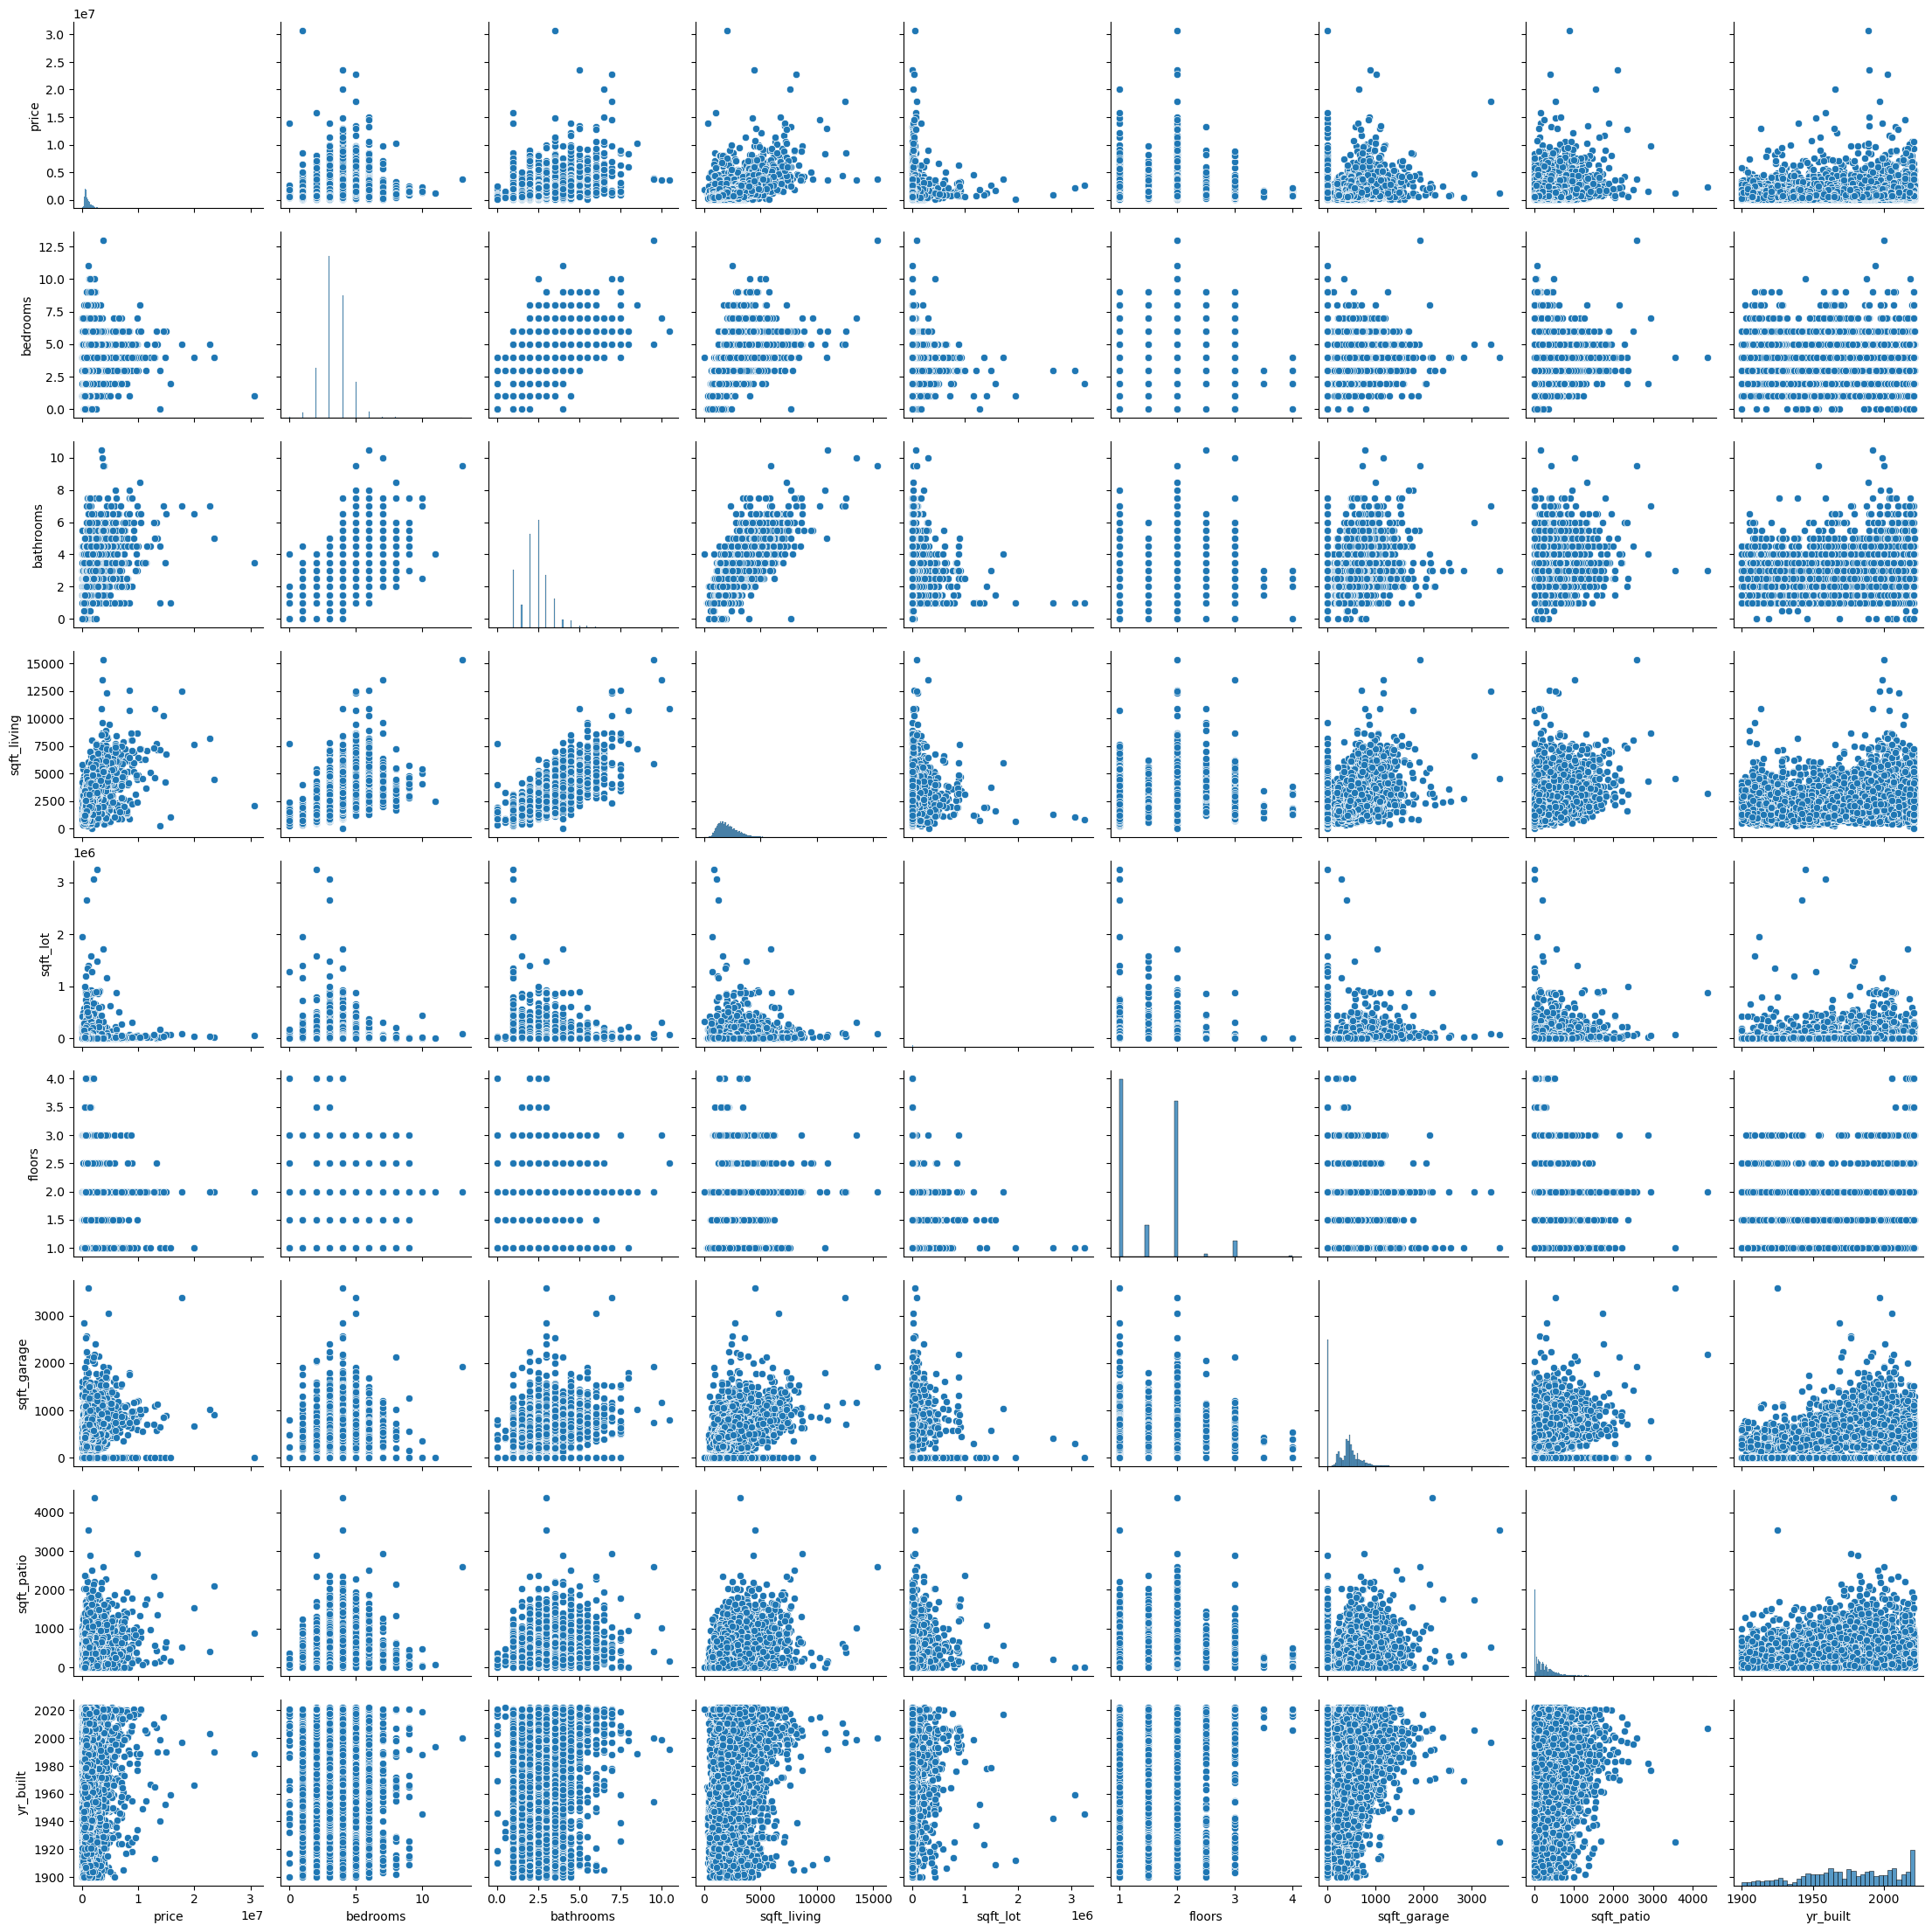

In [10]:
sns.pairplot(kc_house)
plt.show()

### Identifying Categorical Variables

In [11]:
print('bedrooms ', kc_house['bedrooms'].nunique())
print('bathrooms ', kc_house['bathrooms'].nunique())
print('sqft_living ', kc_house['sqft_living'].nunique())
print('sqft_lot ', kc_house['sqft_lot'].nunique())
print('floors ', kc_house['floors'].nunique())
print('waterfront ', kc_house['waterfront'].nunique())
print('greenbelt ', kc_house['greenbelt'].nunique())
print('nuisance ', kc_house['nuisance'].nunique())
print('condition ', kc_house['condition'].nunique())
print('grade ', kc_house['grade'].nunique())
print('heat_source ', kc_house['heat_source'].nunique())
print('sewer_system ', kc_house['sewer_system'].nunique())
print('sqft_garage ', kc_house['sqft_garage'].nunique())
print('sqft_patio ', kc_house['sqft_patio'].nunique())
print('yr_built ', kc_house['yr_built'].nunique())

bedrooms  13
bathrooms  21
sqft_living  1314
sqft_lot  12223
floors  7
waterfront  2
greenbelt  2
nuisance  2
condition  5
grade  12
heat_source  7
sewer_system  4
sqft_garage  411
sqft_patio  526
yr_built  123


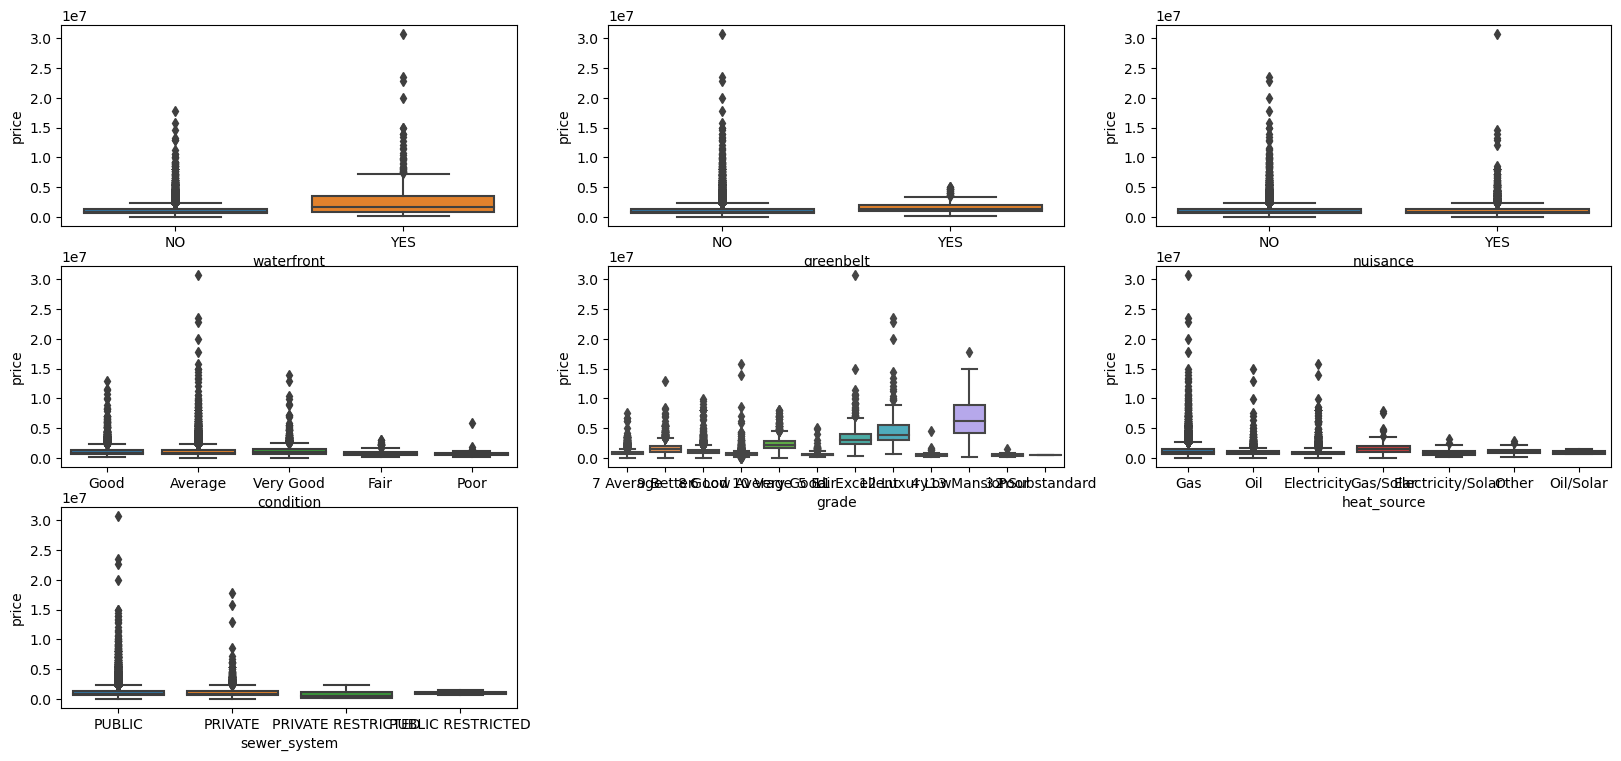

In [12]:
plt.figure(figsize=(20, 12))

plt.subplot(4,3,1)
sns.boxplot(x = 'waterfront', y = 'price', data = kc_house)
plt.subplot(4,3,2)
sns.boxplot(x = 'greenbelt', y = 'price', data = kc_house)
plt.subplot(4,3,3)
sns.boxplot(x = 'nuisance', y = 'price', data = kc_house)
plt.subplot(4,3,4)
sns.boxplot(x = 'condition', y = 'price', data = kc_house)
plt.subplot(4,3,5)
sns.boxplot(x = 'grade', y = 'price', data = kc_house)
plt.subplot(4,3,6)
sns.boxplot(x = 'heat_source', y = 'price', data = kc_house)
plt.subplot(4,3,7)
sns.boxplot(x = 'sewer_system', y = 'price', data = kc_house)
plt.show()

In [13]:
kc_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,Good,8 Good,Oil,PUBLIC,0,210,1921
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,520,2011
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,Average,7 Average,Gas,PUBLIC,240,110,1995
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,480,100,2006


### Data Preparation

In [14]:
kc_house = pd.get_dummies(kc_house, columns=['waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], prefix=['waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True, dtype=np.int64)

In [15]:
kc_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
0,675000.0,4,1.0,1180,7140,1.0,0,40,1969,0,...,0,0,1,0,0,0,0,0,1,0
1,920000.0,5,2.5,2770,6703,1.0,0,240,1950,0,...,0,0,0,0,1,0,0,0,1,0
2,311000.0,6,2.0,2880,6156,1.0,0,0,1956,0,...,0,0,1,0,0,0,0,0,1,0
3,775000.0,3,3.0,2160,1400,2.0,200,270,2010,0,...,1,0,1,0,0,0,0,0,1,0
4,592500.0,2,2.0,1120,758,2.0,550,30,2012,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,0,210,1921,0,...,0,0,0,0,1,0,0,0,1,0
30151,1313000.0,3,2.0,2020,5800,2.0,0,520,2011,0,...,0,0,1,0,0,0,0,0,1,0
30152,800000.0,3,2.0,1620,3600,1.0,240,110,1995,0,...,0,0,1,0,0,0,0,0,1,0
30153,775000.0,3,2.5,2570,2889,2.0,480,100,2006,0,...,0,0,1,0,0,0,0,0,1,0


### Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(kc_house, train_size = 0.7, test_size = 0.3, random_state = 42)

### Rescaling to better allow comparison

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
num_vars = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_garage', 'sqft_patio','yr_built']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
27743,0.015384,0.363636,0.285714,0.201878,0.002337,0.000000,0.216393,0.105263,0.713115,0,...,0,0,1,0,0,0,0,0,1,0
28927,0.038982,0.363636,0.238095,0.240376,0.002441,0.333333,0.157377,0.013730,0.532787,0,...,0,0,1,0,0,0,0,0,1,0
10209,0.023847,0.363636,0.238095,0.191549,0.001052,0.333333,0.124590,0.025172,0.918033,0,...,0,0,1,0,0,0,0,0,1,0
10969,0.074787,0.363636,0.380952,0.285446,0.002018,0.333333,0.160656,0.050343,0.991803,0,...,1,0,1,0,0,0,0,0,1,0
4213,0.022545,0.181818,0.095238,0.066667,0.001540,0.166667,0.000000,0.100686,0.147541,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
df_train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,...,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000
mean,0.034979,0.310071,0.222070,0.173374,0.004995,0.180876,0.107437,0.049301,0.615094,0.015894,...,0.123974,0.002040,0.682260,0.002799,0.097405,0.000142,0.000854,0.000237,0.856858,0.000095
std,0.028680,0.089012,0.083997,0.089990,0.019525,0.189380,0.092945,0.054990,0.262513,0.125069,...,0.329560,0.045123,0.465609,0.052835,0.296515,0.011930,0.029212,0.015401,0.350226,0.009741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020104,0.272727,0.190476,0.108920,0.001354,0.000000,0.000000,0.009153,0.434426,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.027100,0.272727,0.238095,0.154930,0.002164,0.166667,0.127869,0.034325,0.631148,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.041424,0.363636,0.285714,0.220657,0.003109,0.333333,0.167213,0.070938,0.844262,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
mc_test_corr = df_train.corr()
mc_test_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
price,1.000000,0.291029,0.477157,0.608635,0.083315,0.181863,0.255545,0.313513,0.092135,0.244663,...,0.207272,-0.014110,0.144806,0.033624,-0.065944,-0.000868,0.002761,-0.004993,0.025837,-0.003419
bedrooms,0.291029,1.000000,0.581952,0.638128,-0.000376,0.144693,0.319470,0.181040,0.142481,-0.026584,...,0.155368,0.000361,0.225636,0.006204,-0.092717,-0.005006,-0.020560,-0.015902,0.039478,0.000888
bathrooms,0.477157,0.581952,1.000000,0.769839,0.026579,0.405739,0.455452,0.326848,0.445905,0.046183,...,0.259741,-0.002700,0.271132,0.022836,-0.253196,-0.004488,-0.017442,-0.005794,0.045214,-0.000903
sqft_living,0.608635,0.638128,0.769839,1.000000,0.109577,0.304121,0.506577,0.398910,0.290504,0.083414,...,0.301381,-0.012087,0.273522,0.025791,-0.143803,0.000044,-0.005840,-0.011162,-0.054189,-0.001844
sqft_lot,0.083315,-0.000376,0.026579,0.109577,1.000000,-0.032430,0.079267,0.140118,-0.003618,0.068013,...,0.021350,-0.004281,-0.072647,-0.001147,0.012896,-0.001177,0.065283,0.003258,-0.345457,-0.002140
floors,0.181863,0.144693,0.405739,0.304121,-0.032430,1.000000,0.130079,0.132101,0.541984,0.003151,...,0.274724,0.027146,0.125553,0.003928,-0.223776,-0.004395,0.000665,-0.001156,0.137616,0.016416
sqft_garage,0.255545,0.319470,0.455452,0.506577,0.079267,0.130079,1.000000,0.206560,0.447551,-0.014825,...,0.185476,-0.022517,0.301206,0.002080,-0.200562,-0.013792,-0.010418,-0.008568,-0.115192,-0.003701
sqft_patio,0.313513,0.181040,0.326848,0.398910,0.140118,0.132101,0.206560,1.000000,0.144472,0.121664,...,0.156216,0.007281,0.030401,0.012963,-0.101887,-0.006063,0.006164,0.006574,-0.175485,0.008293
yr_built,0.092135,0.142481,0.445905,0.290504,-0.003618,0.541984,0.447551,0.144472,1.000000,-0.042263,...,0.252555,-0.000124,0.179490,-0.004779,-0.322491,-0.014421,-0.007392,-0.003868,0.019133,0.013523
waterfront_YES,0.244663,-0.026584,0.046183,0.083414,0.068013,0.003151,-0.014825,0.121664,-0.042263,1.000000,...,-0.005216,-0.005746,-0.049341,0.000447,0.004311,-0.001516,0.048232,0.047309,-0.106206,-0.001238


In [22]:
mc_test_corr.sort_values('price', ascending=False).head(50)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,waterfront_YES,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
price,1.000000,0.291029,0.477157,0.608635,0.083315,0.181863,0.255545,0.313513,0.092135,0.244663,...,0.207272,-0.014110,0.144806,0.033624,-0.065944,-0.000868,0.002761,-0.004993,0.025837,-0.003419
sqft_living,0.608635,0.638128,0.769839,1.000000,0.109577,0.304121,0.506577,0.398910,0.290504,0.083414,...,0.301381,-0.012087,0.273522,0.025791,-0.143803,0.000044,-0.005840,-0.011162,-0.054189,-0.001844
bathrooms,0.477157,0.581952,1.000000,0.769839,0.026579,0.405739,0.455452,0.326848,0.445905,0.046183,...,0.259741,-0.002700,0.271132,0.022836,-0.253196,-0.004488,-0.017442,-0.005794,0.045214,-0.000903
grade_11 Excellent,0.318236,0.103821,0.209038,0.292773,0.046584,0.068309,0.177283,0.141170,0.067312,0.090860,...,-0.043808,-0.005265,0.061732,0.001646,-0.034077,-0.001389,-0.003405,-0.001794,-0.019614,-0.001134
sqft_patio,0.313513,0.181040,0.326848,0.398910,0.140118,0.132101,0.206560,1.000000,0.144472,0.121664,...,0.156216,0.007281,0.030401,0.012963,-0.101887,-0.006063,0.006164,0.006574,-0.175485,0.008293
grade_12 Luxury,0.297759,0.069249,0.177471,0.249077,0.023924,0.042537,0.137157,0.127405,0.039871,0.072149,...,-0.024908,-0.002994,0.029728,0.023736,-0.021751,-0.000790,-0.001936,-0.001020,-0.009928,-0.000645
bedrooms,0.291029,1.000000,0.581952,0.638128,-0.000376,0.144693,0.319470,0.181040,0.142481,-0.026584,...,0.155368,0.000361,0.225636,0.006204,-0.092717,-0.005006,-0.020560,-0.015902,0.039478,0.000888
sqft_garage,0.255545,0.319470,0.455452,0.506577,0.079267,0.130079,1.000000,0.206560,0.447551,-0.014825,...,0.185476,-0.022517,0.301206,0.002080,-0.200562,-0.013792,-0.010418,-0.008568,-0.115192,-0.003701
waterfront_YES,0.244663,-0.026584,0.046183,0.083414,0.068013,0.003151,-0.014825,0.121664,-0.042263,1.000000,...,-0.005216,-0.005746,-0.049341,0.000447,0.004311,-0.001516,0.048232,0.047309,-0.106206,-0.001238
grade_9 Better,0.207272,0.155368,0.259741,0.301381,0.021350,0.274724,0.185476,0.156216,0.252555,-0.005216,...,1.000000,-0.004246,0.120362,0.007318,-0.101245,-0.004488,-0.010998,0.012902,0.003712,-0.003665


'sqft_living' is the highest variable correlated to price.  
I'll start building my model there.

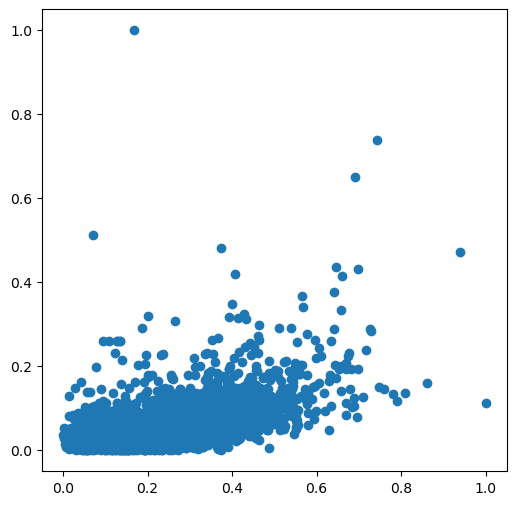

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.sqft_living, df_train.price)
plt.show()

In [24]:
y_train = df_train.pop('price')
X_train = df_train

In [25]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['sqft_living']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
lr.params

const          0.001349
sqft_living    0.193972
dtype: float64

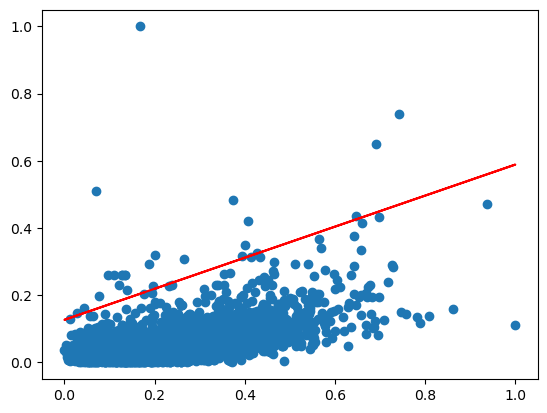

In [27]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.240e+04
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:51   Log-Likelihood:                 49826.
No. Observations:               21077   AIC:                        -9.965e+04
Df Residuals:                   21075   BIC:                        -9.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0013      0.000      3.965      

R-squared is 0.370.  
I can do better than that :-)

The next highest correlated variable was 'bathrooms'  
we'll add that to the model

In [29]:
X_train_lm = X_train[['sqft_living', 'bathrooms']]

In [30]:
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          0.000646
sqft_living    0.188789
bathrooms      0.007213
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     6205.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:51   Log-Likelihood:                 49829.
No. Observations:               21077   AIC:                        -9.965e+04
Df Residuals:                   21074   BIC:                        -9.963e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0006      0.000      1.455      

Hmmm  
R-squared went up to 0.371!  
I'll try adding one more

In [32]:
X_train_lm = X_train[['sqft_living', 'bathrooms', 'grade_11 Excellent']]

In [33]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                 0.002413
sqft_living           0.172938
bathrooms             0.009319
grade_11 Excellent    0.038356
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     4532.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:51   Log-Likelihood:                 50197.
No. Observations:               21077   AIC:                        -1.004e+05
Df Residuals:                   21073   BIC:                        -1.004e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

Ok,     
thats a little better  
I might try adding in all the variables and see what that does.  

In [35]:
kc_house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_garage', 'sqft_patio', 'yr_built', 'waterfront_YES',
       'greenbelt_YES', 'nuisance_YES', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_2 Substandard',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED',
       'sewer_system_PUBLIC', 'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [36]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                              0.044641
bedrooms                          -0.021113
bathrooms                          0.032092
sqft_living                        0.102974
sqft_lot                           0.041079
floors                            -0.003579
sqft_garage                       -0.015200
sqft_patio                         0.022509
yr_built                          -0.014621
waterfront_YES                     0.037877
greenbelt_YES                     -0.000187
nuisance_YES                       0.001586
condition_Fair                    -0.001428
condition_Good                     0.000873
condition_Poor                    -0.007007
condition_Very Good                0.001957
grade_11 Excellent                 0.025939
grade_12 Luxury                    0.061299
grade_13 Mansion                   0.070584
grade_2 Substandard               -0.023242
grade_3 Poor                      -0.042492
grade_4 Low                       -0.036592
grade_5 Fair                    

In [37]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     649.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:51   Log-Likelihood:                 52673.
No. Observations:               21077   AIC:                        -1.053e+05
Df Residuals:                   21041   BIC:                        -1.050e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

An R-squared of 0.519 is an improvement.  
But there are also some high P values here.  
I'll check VIF values 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.96
1,bathrooms,25.55
2,sqft_living,21.70
7,yr_built,12.80
33,sewer_system_PUBLIC,8.06
23,grade_7 Average,6.94
24,grade_8 Good,5.75
27,heat_source_Gas,4.75
5,sqft_garage,4.23
4,floors,3.42


'heat_source_Oil/Solar' has the highest P value,   
so I'll start by dropping that

In [40]:
X = X_train.drop('heat_source_Oil/Solar', axis=1)

In [41]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [42]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     669.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:53   Log-Likelihood:                 52673.
No. Observations:               21077   AIC:                        -1.053e+05
Df Residuals:                   21042   BIC:                        -1.050e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.96
1,bathrooms,25.55
2,sqft_living,21.69
7,yr_built,12.80
32,sewer_system_PUBLIC,8.06
23,grade_7 Average,6.93
24,grade_8 Good,5.75
27,heat_source_Gas,4.75
5,sqft_garage,4.23
4,floors,3.42


In [44]:
X = X.drop('greenbelt_YES', axis=1)

In [45]:
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     689.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:55   Log-Likelihood:                 52673.
No. Observations:               21077   AIC:                        -1.053e+05
Df Residuals:                   21043   BIC:                        -1.050e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.96
1,bathrooms,25.54
2,sqft_living,21.67
7,yr_built,12.76
31,sewer_system_PUBLIC,8.06
22,grade_7 Average,6.92
23,grade_8 Good,5.73
26,heat_source_Gas,4.75
5,sqft_garage,4.23
4,floors,3.42


In [48]:
X = X.drop('heat_source_Other', axis=1)

In [49]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     710.9
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:39:58   Log-Likelihood:                 52673.
No. Observations:               21077   AIC:                        -1.053e+05
Df Residuals:                   21044   BIC:                        -1.050e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.96
1,bathrooms,25.53
2,sqft_living,21.67
7,yr_built,12.76
30,sewer_system_PUBLIC,8.06
22,grade_7 Average,6.91
23,grade_8 Good,5.73
26,heat_source_Gas,4.74
5,sqft_garage,4.23
4,floors,3.42


There are still quite a few high P values there.  


In [52]:
X = X.drop('sewer_system_PUBLIC RESTRICTED', axis=1)
X = X.drop('condition_Fair', axis=1)
X = X.drop('heat_source_Gas', axis=1)
X = X.drop('grade_2 Substandard', axis=1)
X = X.drop('heat_source_Oil', axis=1)
X = X.drop('sewer_system_PRIVATE RESTRICTED', axis=1)
X = X.drop('heat_source_Electricity/Solar', axis=1)
    

In [53]:
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     909.6
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:40:21   Log-Likelihood:                 52669.
No. Observations:               21077   AIC:                        -1.053e+05
Df Residuals:                   21051   BIC:                        -1.051e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [54]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.84
1,bathrooms,25.26
2,sqft_living,20.97
7,yr_built,12.49
24,sewer_system_PUBLIC,7.67
20,grade_7 Average,6.45
21,grade_8 Good,5.47
5,sqft_garage,4.09
4,floors,3.40
22,grade_9 Better,2.82


After all this, I have removed all of the variables that had P values higher than 0.05.  
but the R-squared value didnt change all that much.  
there are still variables with very high VIFs.  
I admit, i didnt want to start removing variables like 'bedrooms'.    
but since that has the highest VIF value, I'll start by removing that and see what it does.

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,25.84
1,bathrooms,25.26
2,sqft_living,20.97
7,yr_built,12.49
24,sewer_system_PUBLIC,7.67
20,grade_7 Average,6.45
21,grade_8 Good,5.47
5,sqft_garage,4.09
4,floors,3.40
22,grade_9 Better,2.82


In [55]:
df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(bathrooms, sqft_living)",0.769839


In [56]:
X = X.drop('bathrooms', axis=1)

In [58]:
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     937.3
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:42:25   Log-Likelihood:                 52610.
No. Observations:               21077   AIC:                        -1.052e+05
Df Residuals:                   21052   BIC:                        -1.050e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,bedrooms,24.58
1,sqft_living,16.41
6,yr_built,11.55
23,sewer_system_PUBLIC,7.57
19,grade_7 Average,6.43
20,grade_8 Good,5.43
4,sqft_garage,4.09
3,floors,3.36
21,grade_9 Better,2.81
5,sqft_patio,2.26


In [60]:
df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc>.5) & (df.cc<1)]

,cc
pairs,
"(sqft_living, bedrooms)",0.638128
"(yr_built, floors)",0.541984
"(grade_7 Average, grade_8 Good)",0.540155
"(sqft_garage, sqft_living)",0.506577


In [61]:
X = X.drop('bedrooms', axis=1)

In [62]:
X_train_lm = sm.add_constant(X)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     973.0
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:50:05   Log-Likelihood:                 52581.
No. Observations:               21077   AIC:                        -1.051e+05
Df Residuals:                   21053   BIC:                        -1.049e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,yr_built,11.52
0,sqft_living,8.37
22,sewer_system_PUBLIC,7.43
18,grade_7 Average,4.84
19,grade_8 Good,4.63
3,sqft_garage,4.08
2,floors,3.36
20,grade_9 Better,2.65
4,sqft_patio,2.25
17,grade_6 Low Average,1.85


In [64]:
X = X.drop('floors', axis=1)

In [67]:
X_train_lm = sm.add_constant(X)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1017.
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:06:57   Log-Likelihood:                 52578.
No. Observations:               21077   AIC:                        -1.051e+05
Df Residuals:                   21054   BIC:                        -1.049e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,yr_built,9.16
0,sqft_living,8.20
21,sewer_system_PUBLIC,7.30
17,grade_7 Average,4.64
18,grade_8 Good,4.62
2,sqft_garage,3.84
19,grade_9 Better,2.65
3,sqft_patio,2.25
16,grade_6 Low Average,1.77
7,condition_Good,1.59


In [68]:
X = X.drop('grade_7 Average', axis=1)

In [69]:
X_train_lm = sm.add_constant(X)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     921.4
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        08:10:29   Log-Likelihood:                 51819.
No. Observations:               21077   AIC:                        -1.036e+05
Df Residuals:                   21055   BIC:                        -1.034e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [70]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,8.20
4,yr_built,7.73
20,sewer_system_PUBLIC,5.32
2,sqft_garage,3.83
3,sqft_patio,2.25
17,grade_8 Good,1.93
18,grade_9 Better,1.57
7,condition_Good,1.41
6,nuisance_YES,1.22
16,grade_6 Low Average,1.21
